In [26]:
from tqdm import tqdm
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_pd = pd.read_csv(r'C:\Users\nakag\OneDrive\Escritorio\suj-1\StreamingHistory_suj1.csv', encoding="utf8")

In [17]:
track_name = data_pd.trackName.unique()
len(track_name)

3737

In [18]:
df1 = data_pd['artistName'].value_counts().rename_axis('Artist').reset_index(name='No: of Artist')
df1.head(10)

Artist  No: of Artist
0        J Balvin           1109
1           Ozuna            831
2       Bad Bunny            748
3        Anuel AA            642
4            Sech            626
5          Maluma            623
6  Rauw Alejandro            607
7            Feid            592
8          Khalid            467
9      The Weeknd            465

<AxesSubplot:ylabel='Artist'>

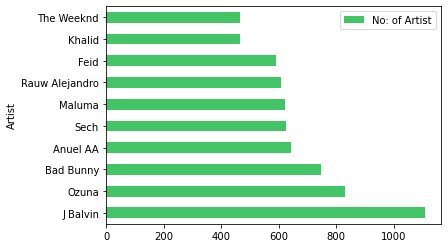

In [19]:
df1.head(10).plot.barh(x ='Artist', y='No: of Artist', color='#43c466')

In [20]:
df1_list = df1['Artist'].head(10).tolist()

In [21]:
print(df1_list)

['J Balvin', 'Ozuna', 'Bad Bunny', 'Anuel AA', 'Sech', 'Maluma', 'Rauw Alejandro', 'Feid', 'Khalid', 'The Weeknd']


In [22]:
a =np.array(df1_list).astype(str)

In [23]:
track_list = data_pd['trackName'].tolist()
print(track_list)

['Mean It', 'Signs', 'This Way - From SUPERFLY - Original Soundtrack', 'NI BIEN NI MAL', 'Baila Baila Baila', 'La Playa', 'La Isla (with Sech & Dalex feat. Justin Quiles, La Exce, Feid, Zion)', 'Saturday Nights', 'Try Me (feat. Jennifer Lopez and Matoma)', 'Eastside (with Halsey & Khalid)', "If I Can't Have You", 'Taste (feat. Offset)', 'Unti-Unti', 'Home with You', 'Maniac', 'Like It Is', 'Selfish', 'THE SCOTTS', 'Righteous', 'Diosa', 'This Way - From SUPERFLY - Original Soundtrack', 'You Needed Love, I Needed You', 'Right To It (with Ashe)', 'Rockin’', 'Restart', 'Me & The Rhythm', 'Scars To Your Beautiful', 'Close', 'My Feelings For You - Digital LAB Remix', 'Reality (feat. Janieck Devy) - Radio Edit', 'Sax', 'One More Weekend', "Don't Let Me Down", 'Havana (feat. Young Thug)', 'Crazy like You', 'iSpy (feat. Lil Yachty)', 'Where Were You In The Morning?', 'Night Changes', "Like I'm Gonna Lose You (feat. John Legend)", "Bluffin'", '¿CÓMO TE VA, QUERIDA?', '7/11', 'You & Me - Flume Re

In [24]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import json
import csv
import pylyrics3
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import spotipy.util as util

client_id ="d9833cd67ed34683b793cd4cee4a0c09" 
secret = "32c1d6dfe3924e1781904bc03e70d73e" 
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
username =	'11159352293'
redirect_uri = 'http://localhost:7777/callback'

scope = 'user-read-recently-played'

token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=secret,     
                                   redirect_uri=redirect_uri)


artist= 'Moses Sumney'
track= 'Lonely World'



import requests
def get_id(track_name: str, token: str, artist: str) -> str:
     headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': f'Bearer ' + token,
    }
     params = [('q', track_name), ('type', 'track'),]
    
    
    
     try:
        response = requests.get('https://api.spotify.com/v1/search', 
                    headers = headers, params = params, timeout = 5)
        json = response.json()
        first_result = json['tracks']['items'][0]
        track_id = first_result['id']
        return track_id
     except:
        return None
    
    

lucy_id = get_id('One time', token, artist = 'The Beatles')
print(lucy_id)


6eDApnV9Jdb1nYahOlbbUh


In [25]:
id_list=[]
for i in tqdm(track_list):

    ids = get_id(i, token, artist='idk')
    id_list.append(ids)
print(id_list)

['3uc8AGNL0KbvISIrjnfRvN', '6Na5uKk5SsqZimk0hAWo8y', '6fbYL76UWbHdYq4B91TPQi', '278kSqsZIiYp8p3QjYAqa8', '7mWFF4gPADjTQjC97CgFVt', '0jeS8PyyIRAG0A3t5DtL71', '0UfVfRSmy4xMyi67LKH5zZ', '7vGGAJBkHKxKtOnGjQduDV', '4tg1G3X26wDTmQbipgxhp5', '0d2iYfpKoM0QCKvcLCkBao', '1JseLOfqWtuqFjIB0DK0BD', '5IaHrVsrferBYDm0bDyABy', '0DdC92EziGIEN6j7kTCKQX', '0iwsQWgtjSq2kUXuZwTDAL', '6KfoDhO4XUWSbnyKjNp9c4', '3frUvGrmGcay91lvFbOgsN', '3XoflnowYPFRPOh3uFvHcm', '39Yp9wwQiSRIDOvrVg7mbk', '48MNrjqr5AvUAHiv1d75A6', '3JHpk0DOTOzyh0777JFAky', '6fbYL76UWbHdYq4B91TPQi', '61E4DgklZb36Oxn8el9NNy', '6aLpLTAUASREvQE105XOb3', '4Y7fEQ4PAzhlLnLviRw2P4', '4OGEMsXsl4T1Fx4U3zpZl5', '4a32Q7bRtWDGSEMbyWKIlj', '42ydLwx4i5V49RXHOozJZq', '4NdE3yBRpjp33X5mbqr6wT', None, '6qLo9jB11Fy9cTbxBfsCRR', '2lqgZDZnlXmVZgToWuoC0l', '4jNRzwGdqkcF11lAvdVHu2', '44mm7paG7axYqrLHJN98v7', '1rfofaqEpACxVEHIZBJe6W', '1l4COF8llXUyQnm2HuqGUX', '2EEeOnHehOozLq4aS0n6SL', '376Gg7Oxo5C5jUWDWpVXeI', '5O2P9iiztwhomNh8xkR9lJ', '2YlZnw2ikdb837oKMKjBkW', '42w7

In [27]:
id_list = [x for x in id_list if x is not None]

In [28]:
print(len(id_list))

16273


In [29]:
def getTrackFeatures(id):
    track_info = sp.track(id)
    features_info = sp.audio_features(id)
    #Información de la canción
    name = track_info['name']
    length = track_info['duration_ms']
    popularity = track_info['popularity']
    #Track features
    acousticness = features_info[0]['acousticness']
    danceability = features_info[0]['danceability']
    energy = features_info[0]['energy']
    instrumentalness = features_info[0]['instrumentalness']
    liveness = features_info[0]['liveness']
    loudness = features_info[0]['loudness']
    speechiness = features_info[0]['speechiness']
    tempo = features_info[0]['tempo']
    time_signature = features_info[0]['time_signature']
    
    track_data = [name, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track_data

In [30]:
import time

In [41]:
from tqdm import tqdm
listOfTrack_AudioFeatures = []

IDs_AlreadyUsed = []

#i = 1
for track_ID in tqdm(id_list):#tqdm es para tener la progress bar
    #sp.audio_analysis("2xmrfQpmS2iJExTlklLoAL")
    
    #track = sp.track(track_ID)
    #print(track_SP)
    
    #track_Name = track["name"]     

    #track_explicit = track['explicit']
    
    
    
    features = sp.audio_features(track_ID)[0] # Get audio features for this specific track

    if features != None:
    
        track_AudioFeatures = [features['energy'], features['liveness'],
                               features['tempo'], features['speechiness'],
                               features['acousticness'], features['instrumentalness'],
                               features['time_signature'], features['danceability'],
                               features['key'], features['duration_ms'],
                               features['loudness'], features['valence'],
                               features['mode'], features['uri']]
    else:
        track_AudioFeatures = [None]*14


    #trackData = ( [ track_Name, track_ID, track_explicit] + track_AudioFeatures )
    trackData = ( [track_ID] + track_AudioFeatures )

    listOfTrack_AudioFeatures.append(trackData)

    #break
    #print(features)

    IDs_AlreadyUsed.append(track_ID)

    time.sleep(0.05)
    #print(i, i/63902)
    
    #i += 1

100%|████████████████████████████████████████████████████████████████████████████| 16273/16273 [49:56<00:00,  5.43it/s]


In [42]:
l1 = id_list

l2 = IDs_AlreadyUsed

TrackIDs_StillNotParsed = [x for x in l1 if x not in l2]

In [43]:
TrackIDs_StillNotParsed [:10]

[]

In [44]:
l1 = id_list

l2 = IDs_AlreadyUsed

TrackIDs_StillNotParsed = [x for x in l1 if x not in l2]
for track_ID in tqdm(TrackIDs_StillNotParsed):
    #sp.audio_analysis("2xmrfQpmS2iJExTlklLoAL")
    
    #track = sp.track(track_ID)
    #print(track_SP)
    
    #track_Name = track["name"]     

    #track_explicit = track['explicit']
    
    
    
    features = sp.audio_features(track_ID)[0] # Get audio features for this specific track

    if features != None:
    
        track_AudioFeatures = [features['energy'], features['liveness'],
                               features['tempo'], features['speechiness'],
                               features['acousticness'], features['instrumentalness'],
                               features['time_signature'], features['danceability'],
                               features['key'], features['duration_ms'],
                               features['loudness'], features['valence'],
                               features['mode'], features['uri']]
    else:
        track_AudioFeatures = [None]*14


    #trackData = ( [ track_Name, track_ID, track_explicit] + track_AudioFeatures )
    trackData = ( [track_ID] + track_AudioFeatures )

    listOfTrack_AudioFeatures.append(trackData)

    #break
    #print(features)

    IDs_AlreadyUsed.append(track_ID)

    time.sleep(0.15)
    #print(i, i/63902)
    
    #i += 1

0it [00:00, ?it/s]


In [45]:
audioFeaturesDF_AllTracks = pd.DataFrame(listOfTrack_AudioFeatures, 
                                columns=  [ "track_id",  #["track_name", "track_id", "explicit",
                                            'energy', 'liveness',
                                            'tempo', 'speechiness',
                                            'acousticness', 'instrumentalness',
                                            'time_signature', 'danceability',
                                            'key', 'duration_ms', 'loudness',
                                            'valence', 'mode', 'track_uri'])

In [52]:
audioFeaturesDF_AllTracks.head(10)

track_id  energy  liveness    tempo  speechiness  \
0  3uc8AGNL0KbvISIrjnfRvN   0.450    0.1720   95.998       0.0872   
1  6Na5uKk5SsqZimk0hAWo8y   0.735    0.1120  107.374       0.0540   
2  6fbYL76UWbHdYq4B91TPQi   0.282    0.1190  124.609       0.0464   
3  278kSqsZIiYp8p3QjYAqa8   0.449    0.2730  128.028       0.0674   
4  7mWFF4gPADjTQjC97CgFVt   0.572    0.2180  100.016       0.1230   
5  0jeS8PyyIRAG0A3t5DtL71   0.683    0.1070  140.108       0.1500   
6  0UfVfRSmy4xMyi67LKH5zZ   0.777    0.5790   90.032       0.1800   
7  7vGGAJBkHKxKtOnGjQduDV   0.439    0.0993  167.908       0.1150   
8  4tg1G3X26wDTmQbipgxhp5   0.680    0.0699  100.033       0.0760   
9  0d2iYfpKoM0QCKvcLCkBao   0.680    0.1160   89.391       0.3210   

   acousticness  instrumentalness  time_signature  danceability  key  \
0        0.0407          0.000000               4         0.746    7   
1        0.1080          0.005780               4         0.794    0   
2        0.6940          0.000000               3         0.620    5   
3        0.5560          0.000018               4         0.826    5   
4        0.0598          0.000000               4         0.785    2   
5        0.1080          0.000000               4         0.796   10   
6        0.4330          0.000000               4         0.794    5   
7        0.6350          0.000019               4         0.540   10   
8        0.0157          0.000000               4         0.579    8   
9        0.5550          0.000000               4         0.560    6   

   duration_ms  loudness  valence  mode                             track_uri  
0       232853    -8.543    0.336     1  spotify:track:3uc8AGNL0KbvISIrjnfRvN  
1       234373    -4.204    0.223     1  spotify:track:6Na5uKk5SsqZimk0hAWo8y  
2       211205   -10.533    0.193     0  spotify:track:6fbYL76UWbHdYq4B91TPQi  
3       236216    -8.330    0.337     0  spotify:track:278kSqsZIiYp8p3QjYAqa8  
4       235284    -7.504    0.490     1  spotify:track:7mWFF4gPADjTQjC97CgFVt  
5       207731    -2.754    0.353     0  spotify:track:0jeS8PyyIRAG0A3t5DtL71  
6       266774    -2.457    0.811     0  spotify:track:0UfVfRSmy4xMyi67LKH5zZ  
7       209547    -8.591    0.371     1  spotify:track:7vGGAJBkHKxKtOnGjQduDV  
8       200240    -5.634    0.211     1  spotify:track:4tg1G3X26wDTmQbipgxhp5  
9       173800    -7.648    0.319     0  spotify:track:0d2iYfpKoM0QCKvcLCkBao

In [53]:
audioFeaturesDF_AllTracks.shape

(16273, 15)

In [55]:
audioFeaturesDF_AllTracks.to_csv("./Track_AudioFeatures_AllTracks2.csv")

In [56]:
audioFeaturesDF_AllTracks_1 = pd.read_csv("./Track_AudioFeatures_AllTracks2.csv").drop(["Unnamed: 0"], axis = 1)

In [57]:
audioFeaturesDF_AllTracks_1.head(20)

track_id  energy  liveness    tempo  speechiness  \
0   3uc8AGNL0KbvISIrjnfRvN   0.450    0.1720   95.998       0.0872   
1   6Na5uKk5SsqZimk0hAWo8y   0.735    0.1120  107.374       0.0540   
2   6fbYL76UWbHdYq4B91TPQi   0.282    0.1190  124.609       0.0464   
3   278kSqsZIiYp8p3QjYAqa8   0.449    0.2730  128.028       0.0674   
4   7mWFF4gPADjTQjC97CgFVt   0.572    0.2180  100.016       0.1230   
5   0jeS8PyyIRAG0A3t5DtL71   0.683    0.1070  140.108       0.1500   
6   0UfVfRSmy4xMyi67LKH5zZ   0.777    0.5790   90.032       0.1800   
7   7vGGAJBkHKxKtOnGjQduDV   0.439    0.0993  167.908       0.1150   
8   4tg1G3X26wDTmQbipgxhp5   0.680    0.0699  100.033       0.0760   
9   0d2iYfpKoM0QCKvcLCkBao   0.680    0.1160   89.391       0.3210   
10  1JseLOfqWtuqFjIB0DK0BD   0.809    0.1470  123.912       0.0603   
11  5IaHrVsrferBYDm0bDyABy   0.559    0.1010   97.994       0.1200   
12  0DdC92EziGIEN6j7kTCKQX   0.380    0.0338  155.970       0.0323   
13  0iwsQWgtjSq2kUXuZwTDAL   0.599    0.0952  170.122       0.0878   
14  6KfoDhO4XUWSbnyKjNp9c4   0.639    0.3540  108.045       0.0435   
15  3frUvGrmGcay91lvFbOgsN   0.728    0.2270  105.024       0.1140   
16  3XoflnowYPFRPOh3uFvHcm   0.646    0.0994  110.971       0.1020   
17  39Yp9wwQiSRIDOvrVg7mbk   0.537    0.1570  129.979       0.0514   
18  48MNrjqr5AvUAHiv1d75A6   0.622    0.1490  142.942       0.0310   
19  3JHpk0DOTOzyh0777JFAky   0.745    0.1530  104.965       0.0630   

    acousticness  instrumentalness  time_signature  danceability  key  \
0        0.04070          0.000000               4         0.746    7   
1        0.10800          0.005780               4         0.794    0   
2        0.69400          0.000000               3         0.620    5   
3        0.55600          0.000018               4         0.826    5   
4        0.05980          0.000000               4         0.785    2   
5        0.10800          0.000000               4         0.796   10   
6        0.43300          0.000000               4         0.794    5   
7        0.63500          0.000019               4         0.540   10   
8        0.01570          0.000000               4         0.579    8   
9        0.55500          0.000000               4         0.560    6   
10       0.52400          0.000000               4         0.690    2   
11       0.02360          0.000000               4         0.884    0   
12       0.18600          0.000407               4         0.629    2   
13       0.06700          0.000000               4         0.631    7   
14       0.00162          0.000000               4         0.628    8   
15       0.12100          0.000009               4         0.794    1   
16       0.02060          0.352000               4         0.723    5   
17       0.23300          0.000000               4         0.716    0   
18       0.03970          0.000000               4         0.707    0   
19       0.39800          0.006030               4         0.801    6   

    duration_ms  loudness  valence  mode                             track_uri  
0        232853    -8.543    0.336     1  spotify:track:3uc8AGNL0KbvISIrjnfRvN  
1        234373    -4.204    0.223     1  spotify:track:6Na5uKk5SsqZimk0hAWo8y  
2        211205   -10.533    0.193     0  spotify:track:6fbYL76UWbHdYq4B91TPQi  
3        236216    -8.330    0.337     0  spotify:track:278kSqsZIiYp8p3QjYAqa8  
4        235284    -7.504    0.490     1  spotify:track:7mWFF4gPADjTQjC97CgFVt  
5        207731    -2.754    0.353     0  spotify:track:0jeS8PyyIRAG0A3t5DtL71  
6        266774    -2.457    0.811     0  spotify:track:0UfVfRSmy4xMyi67LKH5zZ  
7        209547    -8.591    0.371     1  spotify:track:7vGGAJBkHKxKtOnGjQduDV  
8        200240    -5.634    0.211     1  spotify:track:4tg1G3X26wDTmQbipgxhp5  
9        173800    -7.648    0.319     0  spotify:track:0d2iYfpKoM0QCKvcLCkBao  
10       190800    -4.198    0.864     1  spotify:track:1JseLOfqWtuqFjIB0DK0BD  
11       232959    -7.442    0.342     1 